# Feature Selection & Dimensionality Reduction
## Table of Contents
### 1. Introduction to Dimensionality Reduction
### 2. What is Curse of Dimensionality
### 3. Linear-Dimensionality Reduction
### 4. Feature Selection

There are two techniques in Linear-Dimensionality Reduction which we will see:
  a. Principal Component Analysis (PCA)
  b. Linear Discriminant Analysis (LDA)

    (LDA)

**1.What is the Question Being Researched?:**

The question being researched in the "Feature Selection & Dimensionality Reduction" section is how to effectively reduce the dimensionality of data and select relevant features to improve the performance of machine learning models.

**2.Why is it Interesting?:**

This topic is interesting because dimensionality reduction and feature selection are critical steps in data preprocessing and modeling. They address challenges such as the curse of dimensionality, overfitting, and model interpretability, which are fundamental in data science and machine learning.

**3.What is the Theory Behind It?:**

Dimensionality Reduction: Dimensionality reduction techniques like Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are grounded in linear algebra and statistical concepts. PCA finds orthogonal linear combinations of features, while LDA aims to maximize class separability.
Feature Selection: Feature selection methods involve statistical analysis, information gain, and optimization to determine the most relevant features for modeling.

Have Code Examples:

The Jupyter Notebook
 includes code examples that demonstrate how to perform dimensionality reduction using PCA, how to check for multicollinearity, how to decide the number of components, and how to implement logistic regression on PCA-transformed data.
It also provides code examples for feature selection techniques.

## INTRODUCTION TO DIMENSIONALITY REDUCTION

Dimensionality reduction is a crucial technique in feature engineering and data preprocessing that involves reducing the number of features or dimensions in a dataset while preserving as much relevant information as possible. This process is essential for several reasons:

1. Curse of Dimensionality: As the number of features or dimensions in a dataset increases, the data becomes sparser, and the distances between data points become more similar. This makes it challenging to distinguish between different data patterns and can lead to poor model performance.

2. Computational Efficiency: High-dimensional datasets often require more computational resources and time to process and model. Dimensionality reduction can make computations more efficient and reduce training times.

3. Overfitting: Models trained on high-dimensional data are more prone to overfitting, where they learn noise in the data rather than meaningful patterns. Reducing dimensionality can mitigate overfitting.

4. Data Visualization: It is difficult to visualize and interpret data in high-dimensional spaces. Dimensionality reduction techniques can project data into lower-dimensional spaces that are easier to visualize, helping analysts gain insights.

5. Feature Selection: Dimensionality reduction can assist in feature selection by identifying the most informative features while discarding redundant or less relevant ones. This simplifies model interpretation and may improve model generalization.

Common dimensionality reduction techniques include:

1. Principal Component Analysis (PCA): PCA identifies orthogonal axes (principal components) that capture the most variance in the data. It can be used for data exploration, visualization, and feature compression.

2. Linear Discriminant Analysis (LDA): LDA is a supervised technique that maximizes class separability by finding linear combinations of features. It is useful for classification tasks.

3. t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a nonlinear dimensionality reduction technique that is particularly effective for data visualization. It helps preserve pairwise similarities between data points.

4. Autoencoders: Autoencoders are neural network-based techniques that learn compact representations of data. They can capture complex, nonlinear relationships in the data.

5. Dimensionality reduction is typically applied after data preprocessing steps like handling missing values and encoding categorical variables. It is an important tool in the feature engineer's toolkit for improving the quality of data representations, model performance, and the interpretability of machine learning models. However, the choice of dimensionality reduction technique should be made carefully based on the characteristics of the data and the goals of the analysis.


## What is Curse of Dimensionality

### The "Curse of Dimensionality" is a term used in statistics, machine learning, and data analysis to describe the challenges and problems that arise when working with high-dimensional data. It refers to the fact that as the number of features or dimensions in a dataset increases, several issues and difficulties emerge. Here's a detailed explanation of the Curse of Dimensionality:

1. Data Sparsity: In high-dimensional spaces, data points become sparse. As the number of dimensions increases, the volume of the space grows exponentially. Consequently, data points become more dispersed, and there are large empty regions in the space. This sparsity can make it challenging to collect enough data points to adequately represent the underlying data distribution.

2. Increased Computational Complexity: High-dimensional datasets require more computational resources and time to process, analyze, and model. Algorithms that work efficiently in low dimensions often become computationally infeasible or extremely slow in high dimensions. For example, distance calculations and nearest-neighbor searches become much more time-consuming.

3. Data Interpretation and Visualization: It becomes difficult to interpret and visualize data in high-dimensional spaces. While we can easily visualize data in two or three dimensions, it's nearly impossible to visualize data in spaces with hundreds or thousands of dimensions. This makes it challenging to gain insights from the data, understand relationships between variables, and identify patterns.

4. Curse of Noise: In high-dimensional spaces, data is more likely to contain noise or random variations. Models trained on high-dimensional data may capture noise rather than meaningful patterns, leading to overfitting and poor generalization to new data.

5. Distance Measures: As dimensions increase, the concept of distance becomes less meaningful. In high dimensions, data points tend to be equidistant from each other, making it challenging to distinguish between similar and dissimilar points using traditional distance metrics.

6. Increased Sample Size Requirement: To maintain the same level of statistical significance and reliability, high-dimensional datasets require exponentially larger sample sizes. Gathering such large samples can be impractical or costly.

7. Model Complexity: High-dimensional data can lead to overly complex models. With many features, models may require a large number of parameters to capture relationships, making them harder to interpret and more prone to overfitting.

To mitigate the Curse of Dimensionality, practitioners often use dimensionality reduction techniques such as Principal Component Analysis (PCA), feature selection methods, or domain knowledge to reduce the number of features while preserving relevant information. These techniques aim to strike a balance between data representation and computational feasibility, making it easier to work with high-dimensional data effectively.

 ## Linear-Dimensionality Reduction

Linear dimensionality reduction is a technique used in data analysis and machine learning to reduce the number of features (dimensions) in a dataset while preserving the most important information and relationships between variables. It does so by finding linear combinations of the original features, resulting in a lower-dimensional representation of the data. Linear dimensionality reduction is particularly useful when dealing with high-dimensional datasets where the number of features is large compared to the number of data points. Two common linear dimensionality reduction techniques are Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

Here's a brief explanation of both techniques:

### Principal Component Analysis (PCA):

PCA is an unsupervised technique that aims to capture the maximum variance in the data.
It identifies new orthogonal axes (principal components) that are linear combinations of the original features.
Principal components are ranked by the amount of variance they explain, with the first principal component explaining the most variance and subsequent components explaining less.
By selecting a subset of the top principal components, you can reduce the dimensionality of the data while retaining most of its variability.
Use cases:

Data compression and denoising.
Visualization of high-dimensional data.
Preprocessing for machine learning to reduce multicollinearity and computational complexity.

In [44]:
#Installing required Libraries

In [45]:
!pip install matplotlib


In [46]:
!pip install seaborn

In [47]:
!pip install scikit-learn


In [48]:
!pip install statsmodels


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

To apply PCA, we would need a numerical dataset consisting of continuous variables (i.e., not categorical data). The dataset should have at least two variables, and it is recommended to have at least 5 to 10 times as many observations as there are variables. Here we have taken Diabetes in People Dataset.

In [50]:
#Reading dataset
diabetes=pd.read_csv("https://raw.githubusercontent.com/Tanvivalkunde/ADSA/main/diabetes.csv")

In [51]:
print(diabetes.shape)


(768, 9)


In [52]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Finally, it is important to carefully consider the goals and assumptions of your analysis before applying PCA. PCA can be a powerful tool for understanding and visualizing the structure of a dataset, but it is not always appropriate or necessary for every situation.

Checking for Null values

In [54]:
diabetes.isnull().sum().unique()

array([0])

In [55]:
X=diabetes.iloc[:,1:]
y=diabetes.iloc[:,0]

In [56]:
print(X.shape)
X.head()

(768, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [57]:
print(y.shape)
y.head()

(768,)


0    6
1    1
2    8
3    1
4    0
Name: Pregnancies, dtype: int64

## Checking for Multicollinearity

PCA assumes that the variables are linearly related, so it is important to check for multicollinearity before applying PCA. If there is high correlation between the variables, PCA may not be appropriate.

In [58]:
import pandas as pd
import numpy as np

# Loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/Tanvivalkunde/ADSA/main/diabetes.csv')

# Calculate the correlation matrix
correlation = data.corr()

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(correlation)

# Print or work with the eigenvalues and eigenvectors as needed


The eigenvalues represent the variance explained by each principal component. If there are one or more small eigenvalues, it indicates that the variables are highly correlated and that there may be multicollinearity in the data.

In [59]:
small_eigenvalues = eigenvalues[eigenvalues < 1]                                  # Threshold may vary as per situation

if len(small_eigenvalues) > 0:
    print("There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated")
else:
    print("There are no small eigenvalues in the correlation matrix.")

There are small eigenvalues in the correlation matrix, thus varialbles are not highly correlated


Moreover, PCA requires that the data be standardized, meaning that each variable should be scaled to have a mean of zero and a standard deviation of one. This is necessary because PCA is sensitive to differences in scale between variables, and standardization ensures that all variables are treated equall

In [60]:
X_scaled=StandardScaler().fit_transform(X)                                                # Standardized the data

## Deciding n_components for PCA
Calculate the total sum of eigenvalues.

In [61]:
sortedValues = np.argsort(eigenvalues, axis=0)[::-1]
sortedVectors = eigenvectors[:, sortedValues]

Calculate the proportion of variance explained by each principal component by dividing the eigenvalue of each principal component by the total sum of eigenvalues.

Calculate the cumulative proportion of variance explained by adding up the proportions of variance explained by the principal components

Choose the number of principal components that explain a desired amount of variance.

<ipython-input-62-9dcd7d8b4dc9>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 10, 1)


(1.0, 10.0)

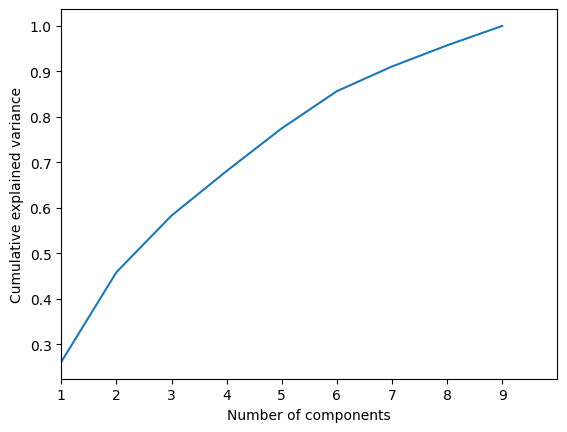

In [62]:
cumulative_sum = np.cumsum(eigenvalues[sortedValues]) / np.sum(eigenvalues[sortedValues])
xint = range(1, len(cumulative_sum) + 1)
plt.plot(xint, cumulative_sum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 10, 1)

Deciding the appropriate number of principal components for PCA is an important step in dimensionality reduction. There are a few methods that can be used to determine the appropriate number of principal components to use. Here are three common methods:

Scree Plot: A scree plot shows the amount of variance explained by each principal component. We can choose the number of principal components that correspond to the "elbow" in the scree plot, which is the point at which adding additional components provides diminishing returns in terms of explained variance.

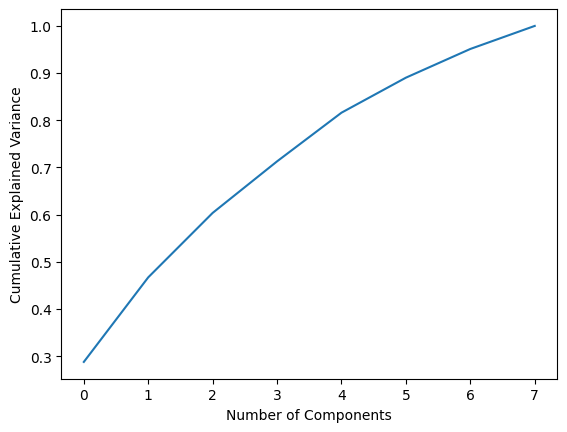

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Proportion of variance explained: Another approach is to choose the number of principal components that explain a certain proportion of the variance in the data. For example, we might choose to retain enough principal components to explain 95% of the variance in the data.

In [64]:
pca = PCA(0.95)                                                                 # Retain enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [65]:
X_pca.shape                                                                     # Shape of data after applying PCA

(768, 7)

## Implementing Logistic Regression on PCA transformed data

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression model on transformed data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test set and evaluate performance
y_pred = lr.predict(X_test)

In [67]:
# Evaluate the model on the training data
train_accuracy = lr.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = lr.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.2752442996742671
Testing accuracy: 0.13636363636363635


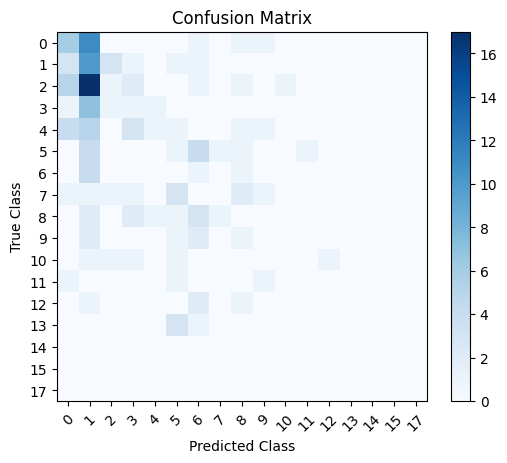

              precision    recall  f1-score   support

           0       0.29      0.30      0.29        20
           1       0.15      0.53      0.24        19
           2       0.14      0.04      0.06        28
           3       0.09      0.09      0.09        11
           4       0.33      0.06      0.11        16
           5       0.08      0.08      0.08        12
           6       0.06      0.17      0.09         6
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

   micro avg       0.14   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

Selecting the fewest possible components that can account for at least 95% of the variance in the data is a frequent strategy. However, in this instance, the n number of components failed to adequately describe the facts.

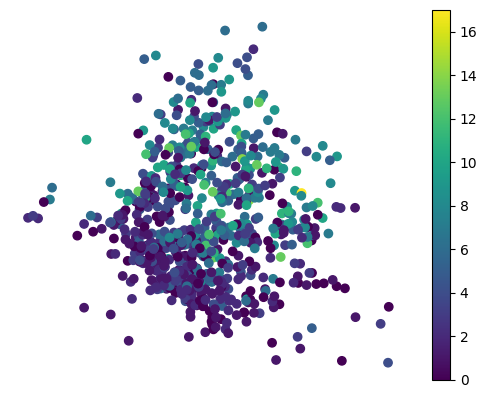

In [69]:
from sklearn.decomposition import PCA
PCA_train_x = PCA(2).fit_transform(X_scaled)

plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1],c=y)
plt.axis('off')
plt.colorbar()
plt.show()


## Linear Discriminant Analysis (LDA):

LDA is a supervised technique used for classification tasks.
It aims to maximize the separation between different classes by finding linear combinations of features that best discriminate between classes.
LDA considers both within-class scatter and between-class scatter to determine the discriminative power of features.
The resulting linear discriminants are used for classification.
Use cases:

Dimensionality reduction for classification tasks.
Feature extraction to enhance class separability.
Linear dimensionality reduction techniques are valuable for simplifying data representations, reducing computational complexity, addressing multicollinearity, and improving model performance. The choice between PCA and LDA depends on whether your goal is to reduce dimensionality for unsupervised analysis or for classification tasks. Both techniques help to capture the essential information in your data while reducing its dimensionality, making it more manageable and suitable for further analysis or modeling.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()                                                            # Standardizing the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## IMPLEMENTING LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [73]:
# Transforming data using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)

In [75]:
# Evaluate the model on the training data
train_accuracy = clf.score(X_train_lda, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = clf.score(X_test_lda, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.28338762214983715
Testing accuracy: 0.14285714285714285


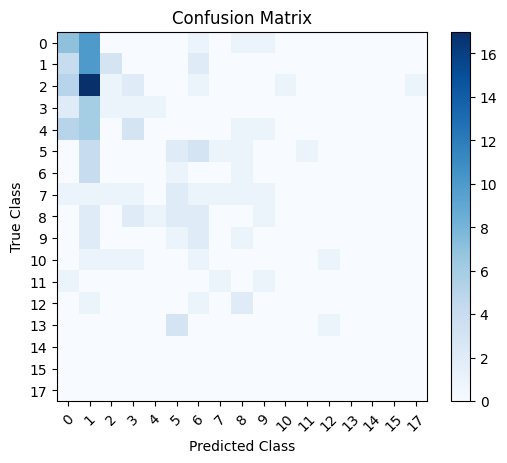

              precision    recall  f1-score   support

           0       0.28      0.35      0.31        20
           1       0.16      0.53      0.24        19
           2       0.14      0.04      0.06        28
           3       0.10      0.09      0.10        11
           4       0.00      0.00      0.00        16
           5       0.18      0.17      0.17        12
           6       0.00      0.00      0.00         6
           7       0.33      0.10      0.15        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

   micro avg       0.14   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

## FEATURE SELECTION

Feature selection is a critical aspect of data science and machine learning that involves choosing a subset of the most relevant features (variables or attributes) from a larger set of available features in a dataset. It plays a pivotal role in the entire data analysis pipeline and model building process. Here's a brief explanation of feature selection and its importance:

What Is Feature Selection?

Feature selection refers to the process of selecting a subset of features from the original set of features in a dataset, with the goal of improving model performance, reducing overfitting, and enhancing model interpretability.
Features can include variables, attributes, or columns in your dataset, and selecting the right subset of features can have a profound impact on the effectiveness of your data analysis and machine learning models.
Why Is Feature Selection Important?

Improved Model Performance: By selecting only the most relevant features, you reduce noise and irrelevant information in the data. This can lead to improved model performance, as models can focus on the most informative aspects of the data.

Reduced Overfitting: High-dimensional datasets with many features can lead to overfitting, where a model captures noise in the data rather than true patterns. Feature selection helps mitigate overfitting by simplifying the model.

Enhanced Interpretability: Models with fewer features are easier to interpret and explain. Feature selection can lead to more interpretable models, which are essential in domains where interpretability matters, such as healthcare and finance.

Reduced Computational Complexity: Training models with fewer features can significantly reduce computational complexity, making it possible to work with large datasets more efficiently.

Data Visualization: Feature selection can improve data visualization by reducing the dimensionality of the data, making it easier to explore and understand.

Methods of Feature Selection:

Filter Methods: These methods use statistical measures to score and rank features based on their individual relevance to the target variable. Common techniques include correlation analysis, mutual information, and chi-squared tests.

Wrapper Methods: Wrapper methods evaluate feature subsets by training and testing models with different combinations of features. Techniques like forward selection, backward elimination, and recursive feature elimination fall under this category.

Embedded Methods: Embedded methods perform feature selection as an integral part of the model training process. Techniques like L1 regularization (Lasso), decision tree-based feature importance, and feature selection through feature engineering are examples.

Challenges in Feature Selection:

Curse of Dimensionality: High-dimensional datasets can pose challenges for feature selection. The curse of dimensionality makes it harder to identify relevant features and requires careful selection methods.

Data Quality: Feature selection is only as good as the quality of the data. Noisy or irrelevant features may not be easy to filter out.

Domain Knowledge: Incorporating domain knowledge is often crucial in feature selection. Some features may be relevant even if statistical methods suggest otherwise.

In summary, feature selection is a critical step in the data science process that can have a significant impact on model accuracy, efficiency, and interpretability. The choice of feature selection method should be guided by the nature of the data, the problem you're solving, and the goals of your analysis or modeling task.

In [77]:
# installing dependencies
!pip install eli5

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [79]:
# Reading the ablone dataset
data = pd.read_csv("https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv")

In [80]:
# Viewing data in the file
data.head()

,PID,MS_SubClass,Lot_Frontage,Lot_Area,Street,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,...,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Mo_Sold,Yr_Sold,SalePrice
0,527258010,20,88,11394,Pave,1,1,9,2,2010,...,1,1,1,1,8,1,834,6,2010,394432
1,533238045,20,57,12853,Pave,1,1,8,5,2010,...,1,1,1,1,6,1,852,4,2010,267916
2,906385020,20,64,7360,Pave,1,1,7,5,2010,...,2,0,2,1,6,0,615,3,2010,187000
3,528108120,60,102,12858,Pave,1,2,9,5,2009,...,2,1,3,1,10,1,751,1,2010,376162
4,528120060,20,83,10159,Pave,1,1,9,5,2009,...,2,1,3,1,8,1,606,4,2010,395192


In [81]:
# checking if the any data is missing
data.isnull().sum()

PID              0
MS_SubClass      0
Lot_Frontage     0
Lot_Area         0
Street           0
Bldg_Type        0
House_Style      0
Overall_Qual     0
Overall_Cond     0
Year_Built       0
Gr_Liv_Area      0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
TotRms_AbvGrd    0
Fireplaces       0
Garage_Area      0
Mo_Sold          0
Yr_Sold          0
SalePrice        0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

<Figure size 800x500 with 0 Axes>

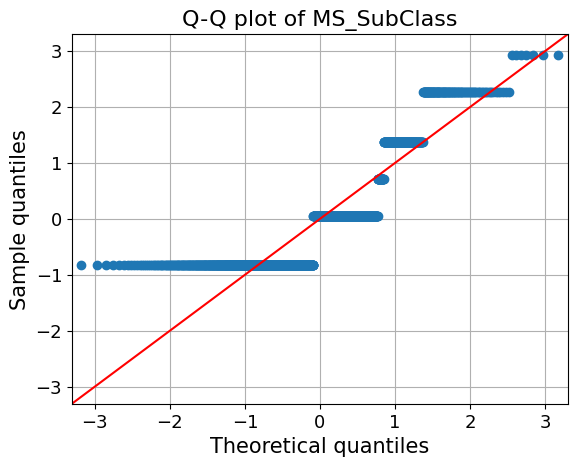

<Figure size 800x500 with 0 Axes>

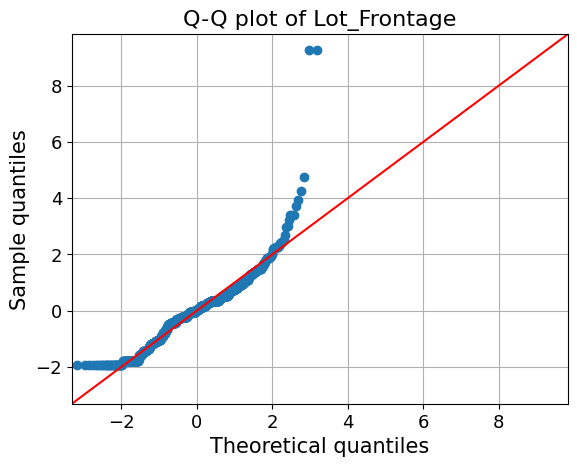

<Figure size 800x500 with 0 Axes>

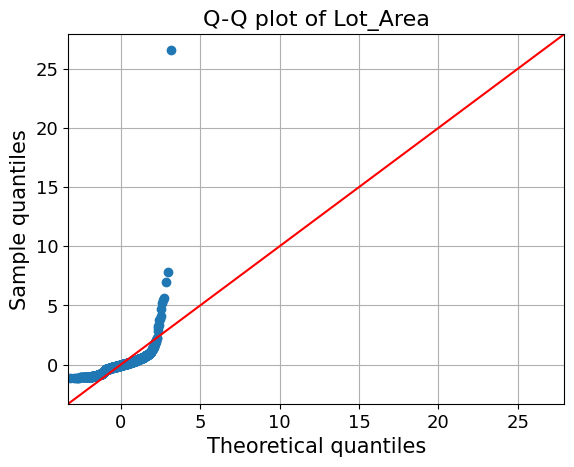

<Figure size 800x500 with 0 Axes>

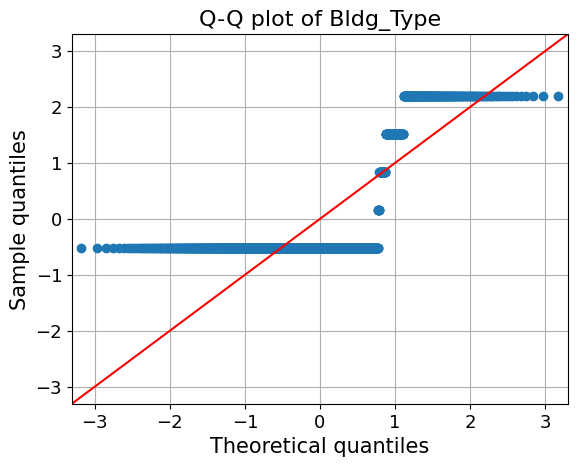

<Figure size 800x500 with 0 Axes>

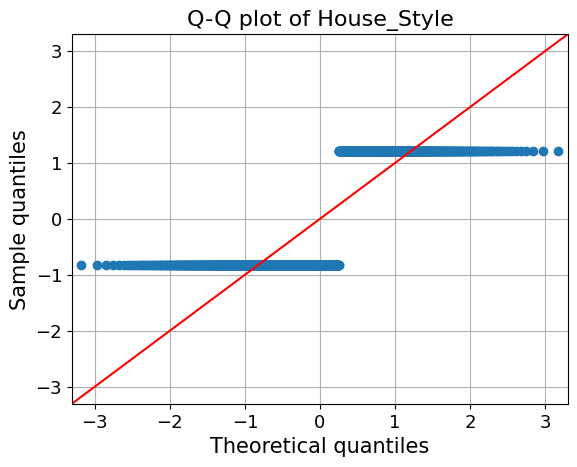

<Figure size 800x500 with 0 Axes>

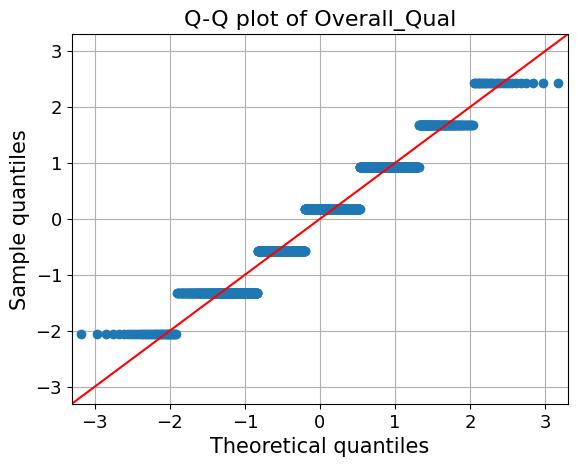

<Figure size 800x500 with 0 Axes>

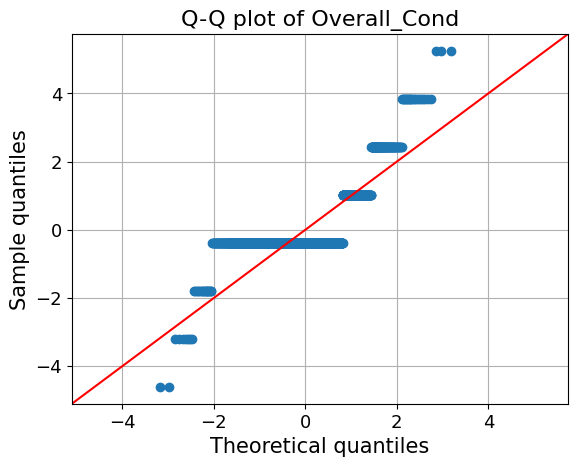

<Figure size 800x500 with 0 Axes>

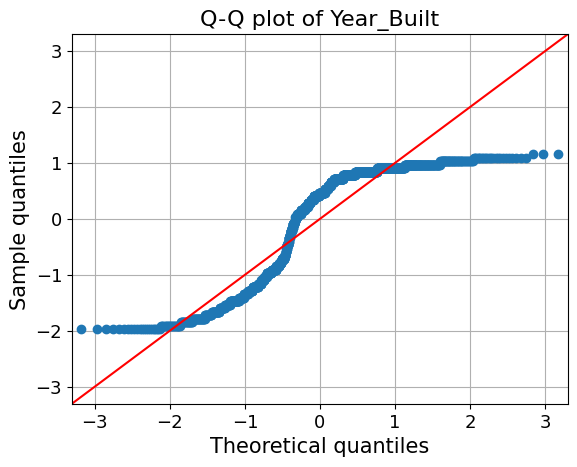

<Figure size 800x500 with 0 Axes>

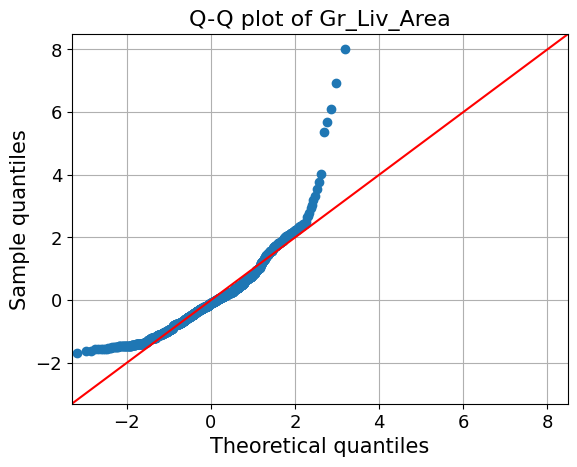

<Figure size 800x500 with 0 Axes>

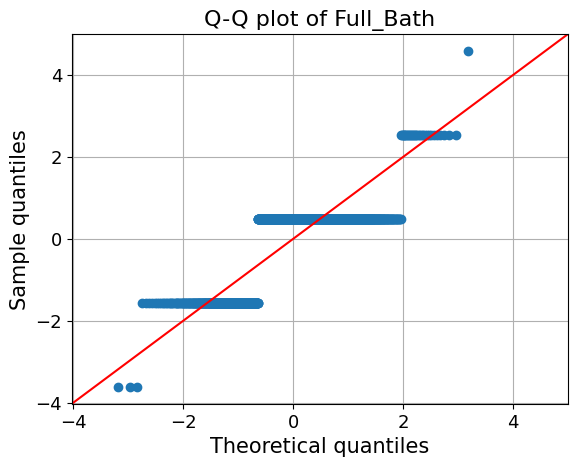

<Figure size 800x500 with 0 Axes>

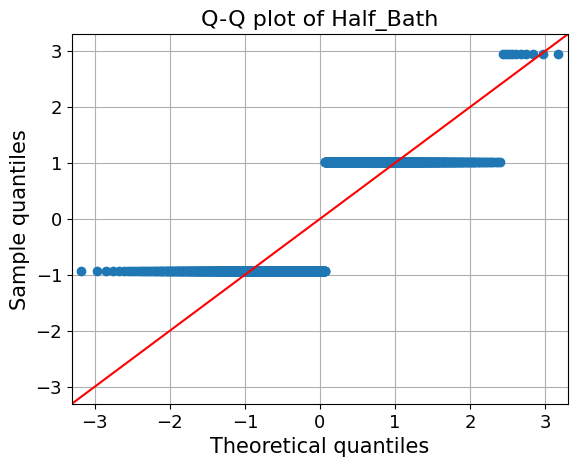

<Figure size 800x500 with 0 Axes>

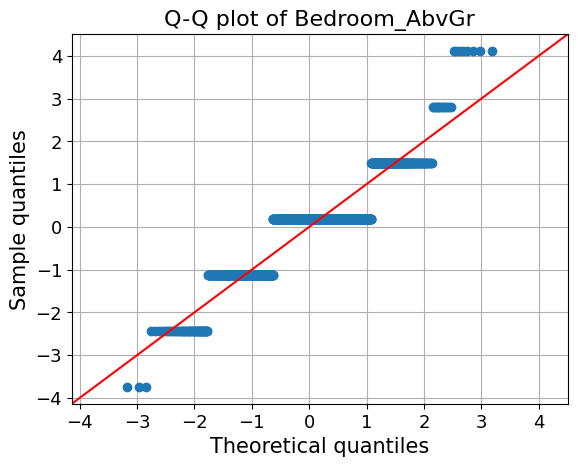

<Figure size 800x500 with 0 Axes>

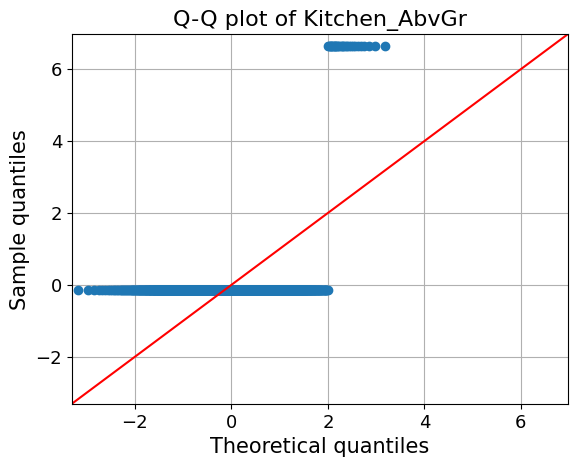

<Figure size 800x500 with 0 Axes>

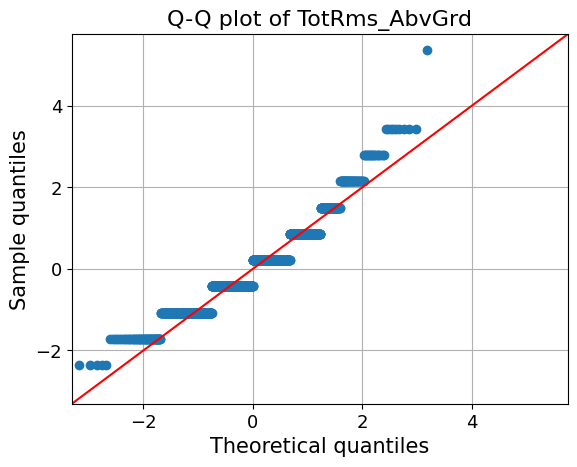

<Figure size 800x500 with 0 Axes>

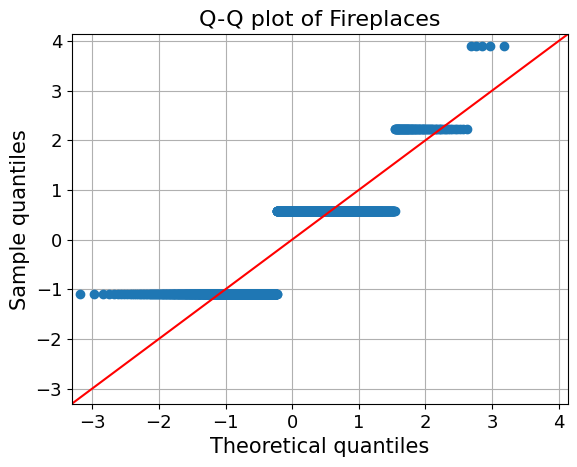

<Figure size 800x500 with 0 Axes>

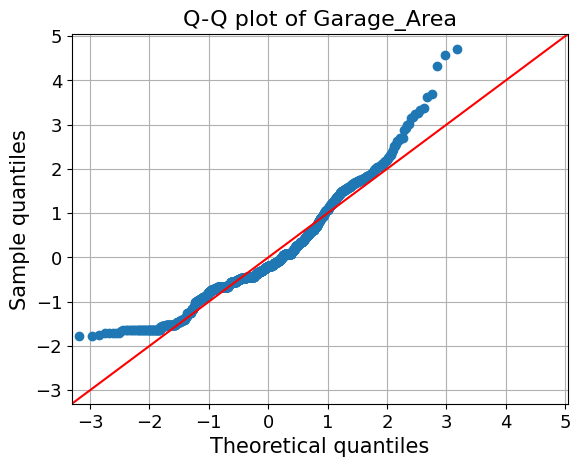

<Figure size 800x500 with 0 Axes>

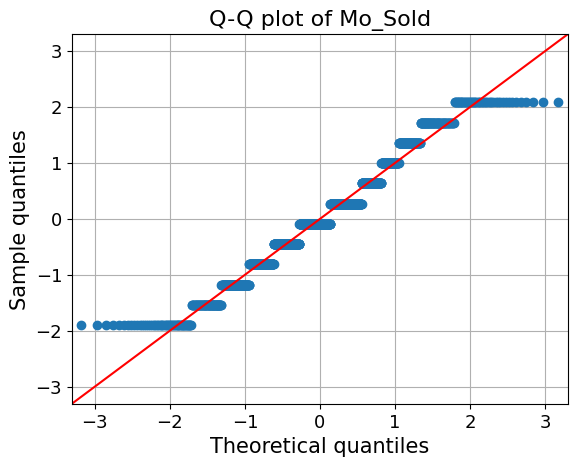

<Figure size 800x500 with 0 Axes>

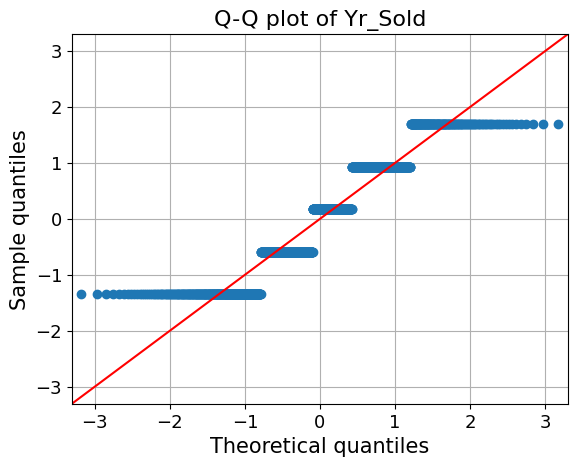

In [82]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    [ 'MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area', 'Mo_Sold', 'Yr_Sold']
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

<Axes: >

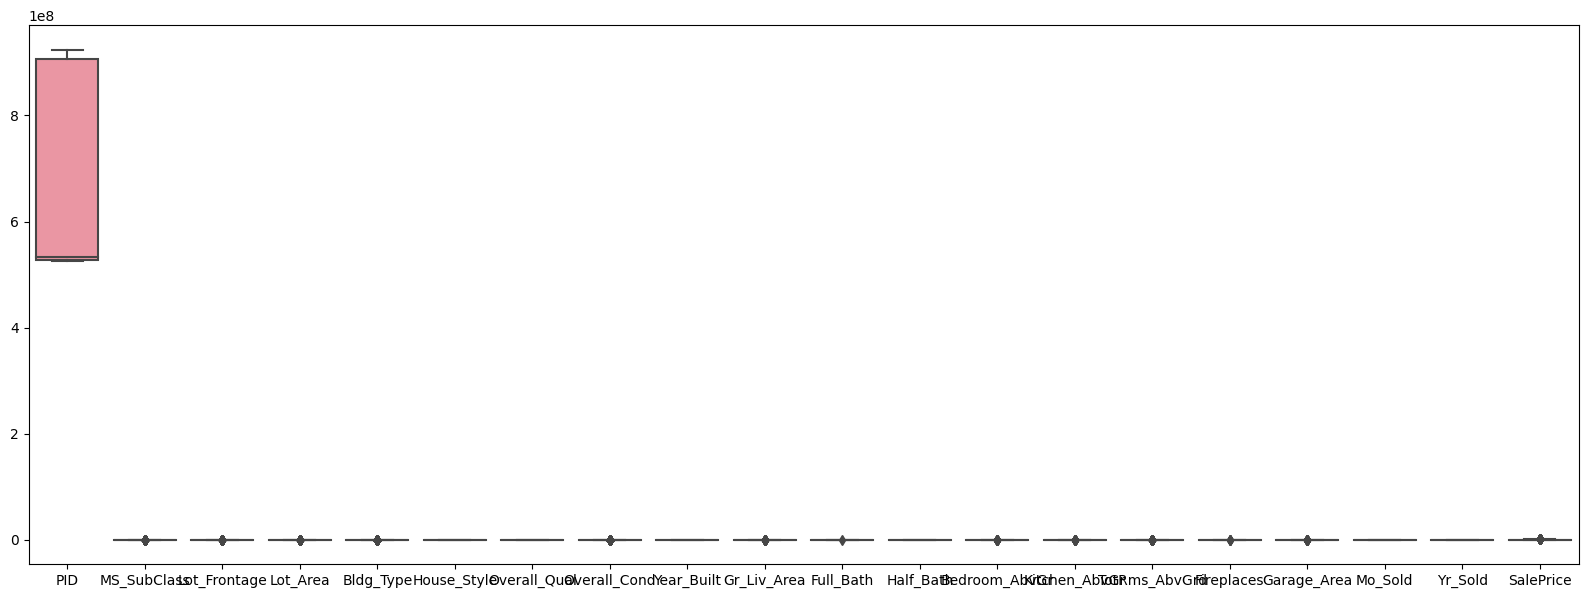

In [83]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

In [84]:
# checking the correlation between all the features in the data
data.corr()

<ipython-input-84-38a63e203d79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PID,MS_SubClass,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Mo_Sold,Yr_Sold,SalePrice
PID,1.000000,-0.137280,-0.007815,0.065313,-0.117729,-0.080842,-0.188866,0.010497,-0.000035,-0.121054,-0.099848,-0.111646,0.021261,0.063688,-0.093392,-0.142093,-0.073804,-0.058926,-0.019368,-0.165874
MS_SubClass,-0.137280,1.000000,-0.561508,-0.326358,0.851354,0.411901,-0.004965,-0.124173,0.037471,-0.022035,0.061073,0.260781,-0.172932,0.108351,-0.120397,-0.061045,-0.232930,0.013016,-0.009618,-0.168209
Lot_Frontage,-0.007815,-0.561508,1.000000,0.458114,-0.594786,-0.071071,0.229470,-0.007443,0.044179,0.424380,0.168756,0.005655,0.298965,0.010029,0.426193,0.257422,0.430554,-0.001259,-0.013879,0.368653
Lot_Area,0.065313,-0.326358,0.458114,1.000000,-0.348911,-0.046783,0.158663,-0.034945,0.009259,0.334941,0.107773,0.026524,0.156055,-0.004293,0.285148,0.260575,0.269114,0.012023,-0.013998,0.311008
Bldg_Type,-0.117729,0.851354,-0.594786,-0.348911,1.000000,-0.028968,-0.002219,-0.096245,0.016826,-0.219050,-0.035454,-0.089835,-0.408145,0.127187,-0.339562,-0.070020,-0.236508,0.003981,0.019579,-0.190492
House_Style,-0.080842,0.411901,-0.071071,-0.046783,-0.028968,1.000000,0.075454,-0.114292,0.150001,0.443029,0.278631,0.770015,0.412985,-0.030892,0.424446,0.072209,-0.005872,0.003641,-0.040288,0.073931
Overall_Qual,-0.188866,-0.004965,0.229470,0.158663,-0.002219,0.075454,1.000000,-0.291932,0.688779,0.609569,0.539325,0.070715,-0.086306,-0.179712,0.413303,0.417055,0.617785,0.038859,-0.014589,0.795092
Overall_Cond,0.010497,-0.124173,-0.007443,-0.034945,-0.096245,-0.114292,-0.291932,1.000000,-0.441336,-0.242006,-0.305569,-0.111942,0.000601,-0.079129,-0.193934,-0.060958,-0.214428,-0.023237,0.016520,-0.209887
Year_Built,-0.000035,0.037471,0.044179,0.009259,0.016826,0.150001,0.688779,-0.441336,1.000000,0.390268,0.606092,0.076203,-0.121861,-0.175849,0.258859,0.148085,0.475366,0.002417,-0.007133,0.546746
Gr_Liv_Area,-0.121054,-0.022035,0.424380,0.334941,-0.219050,0.443029,0.609569,-0.242006,0.390268,1.000000,0.593839,0.404334,0.419586,0.066580,0.808686,0.482125,0.585503,0.033335,-0.049080,0.729257


<ipython-input-85-0d33ea995755>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

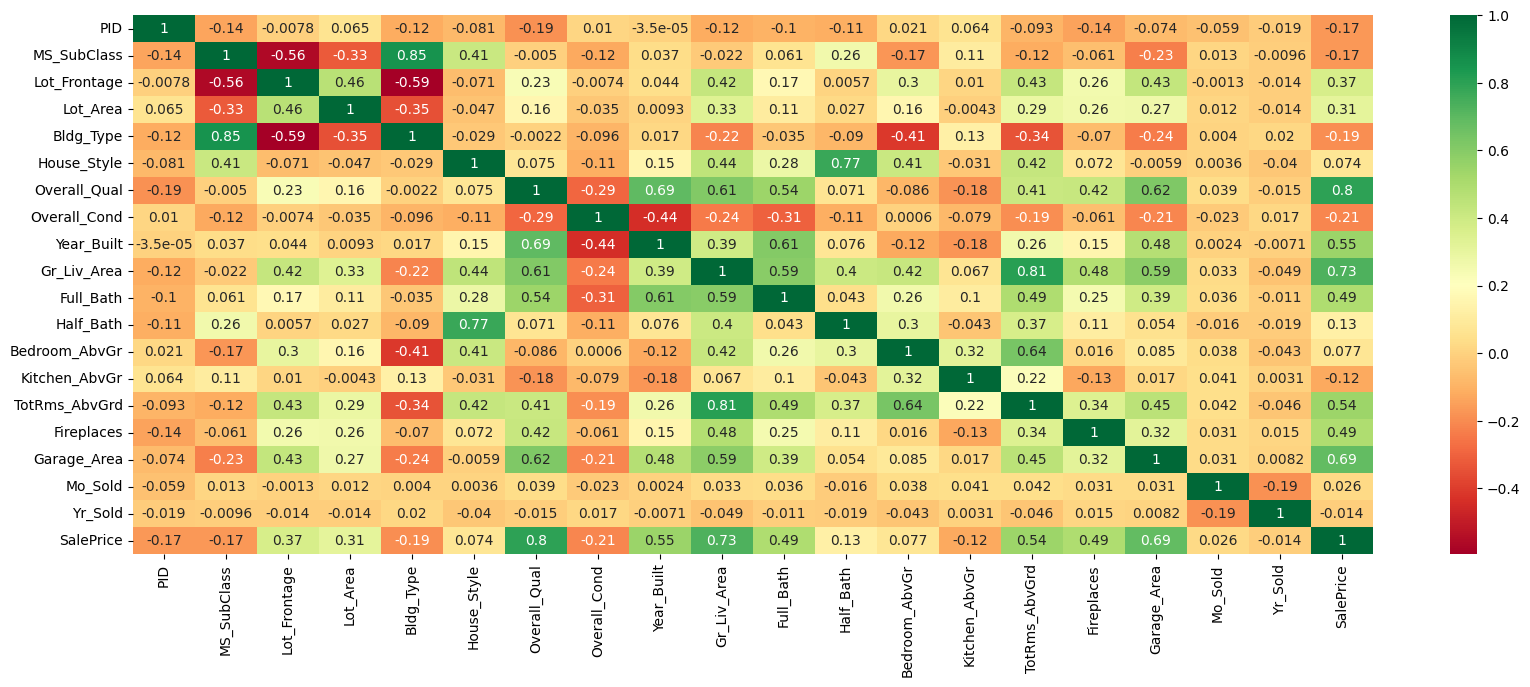

In [85]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

From The above Heat Map we can see that 'OverallQual','GrLivArea' are strongly correlated with 'SalePrice'.

In [86]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data["SalePrice"],
    data[
        [
            "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2290.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        01:49:03   Log-Likelihood:                         -16272.
No. Observations:                1351   AIC:                                  3.258e+04
Df Residuals:                    1333   BIC:                                  3.267e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MS_SubClass     -62.7056     87.507     -0.717      0.474    -234.372     108.961
Lot_Frontage   -196.1050     64.071     -3.061      0.002    -321.796     -70.414
Lot_Area          0.5014      0.172      2.915      0.004       0.164       0.839
Bldg_Type     -2382.5586   2540.589     -0.938      0.349   -7366.547    2601.430
Year_Built      439.3087    125.496      3.501      0.000     193.117     685.500
House_Style   -3.294e+04   5717.464     -5.761      0.000   -4.42e+04   -2.17e+04
Overall_Qual   2.582e+04   1591.114     16.226      0.000    2.27e+04    2.89e+04
Overall_Cond   6024.8433   1822.396      3.306      0.001    2449.768    9599.919
Gr_Liv_Area      71.4489      5.476     13.048      0.000      60.707      82.191
Full_Bath     -3215.2604   3833.022     -0.839      0.402   -1.07e+04    4304.152
Half_Bath      8850.0017   3843.905      2.302      0.021    1309.239    1.64e+04
Bedroom_AbvGr -2528.8816   2498.927     -1.012      0.312   -7431.140    2373.376
Kitchen_AbvGr -3.183e+04   9503.405     -3.349      0.001   -5.05e+04   -1.32e+04
TotRms_AbvGrd  2508.4479   1550.620      1.618      0.106    -533.474    5550.370
Fireplaces     1.008e+04   2320.723      4.344      0.000    5529.629    1.46e+04
Garage_Area      69.9854      9.341      7.492      0.000      51.661      88.310
Mo_Sold        -202.5427    410.190     -0.494      0.622   -1007.230     602.145
Yr_Sold        -467.2572    123.960     -3.769      0.000    -710.435    -224.080
==============================================================================
Omnibus:                      795.223   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72711.104
Skew:                          -1.841   Prob(JB):                         0.00
Kurtosis:                      38.751   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is the summary output of a multiple linear regression model, where SalePrice is the dependent variable and the other 18 variables listed are independent variables that are being used to predict the SalePrice.

The R-squared value of 0.969 indicates that 96.9% of the variance in the dependent variable is explained by the independent variables in the model. The Adjusted R-squared value of 0.968 indicates that the model is not overfitting, and the F-statistic of 2290 with a p-value of 0.00 suggests that the model is statistically significant.

Each of the independent variables in the model is associated with a coefficient, standard error, t-value, p-value, and 95% confidence interval. The t-value measures the number of standard deviations that the coefficient estimate is from zero. A p-value less than 0.05 indicates that the variable is statistically significant in predicting the dependent variable

Some significant variables include Lot_Frontage, Year_Built, House_Style, Overall_Qual, Gr_Liv_Area, Half_Bath, Kitchen_AbvGr, Fireplaces, Garage_Area, and Yr_Sold, as they have a p-value less than 0.05.

However, other variables such as MS_SubClass, Bldg_Type, Full_Bath, Bedroom_AbvGr, TotRms_AbvGrd, and Mo_Sold are not significant in predicting the SalePrice, as their p-values are greater than 0.05.

The Omnibus test and Jarque-Bera (JB) test measure the normality assumption of the residuals, and the Durbin-Watson test measures the independence assumption of the residuals. A significant Omnibus and JB tests (p-value less than 0.05) suggest that the residuals are not normally distributed, and a value of the Durbin-Watson test between 1.5 and 2.5 indicates that there is no significant autocorrelation in the residuals.

** Building the Model
Train ,Validation and Test split **

In [87]:
from sklearn.model_selection import train_test_split

X = data[
    [
        "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

y = data["SalePrice"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

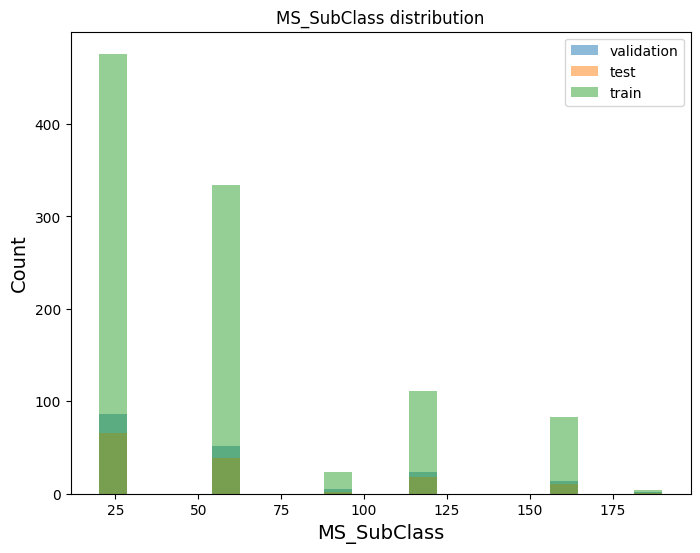

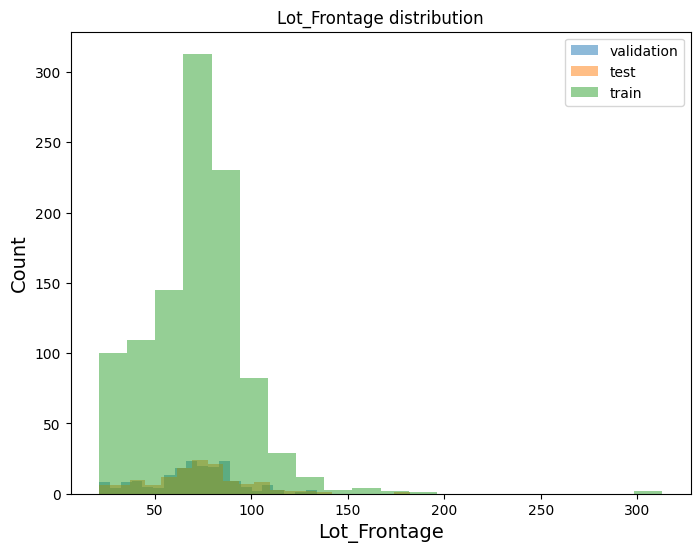

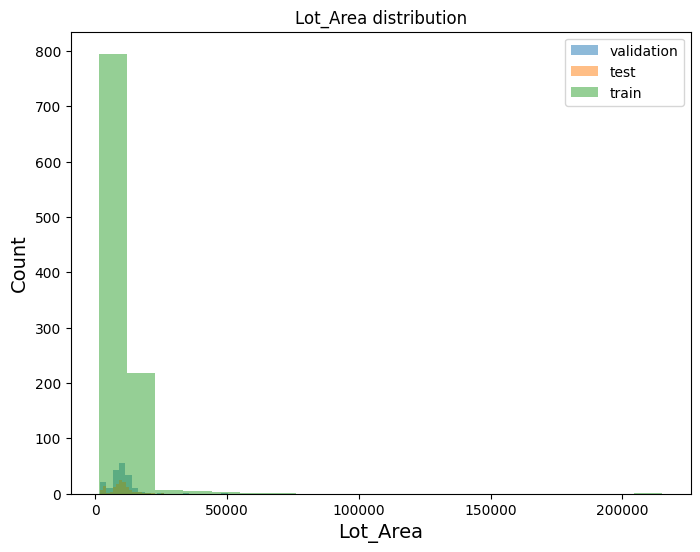

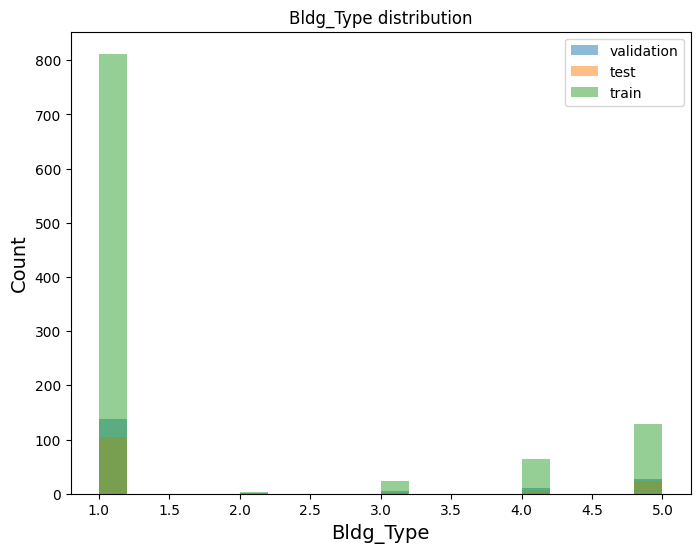

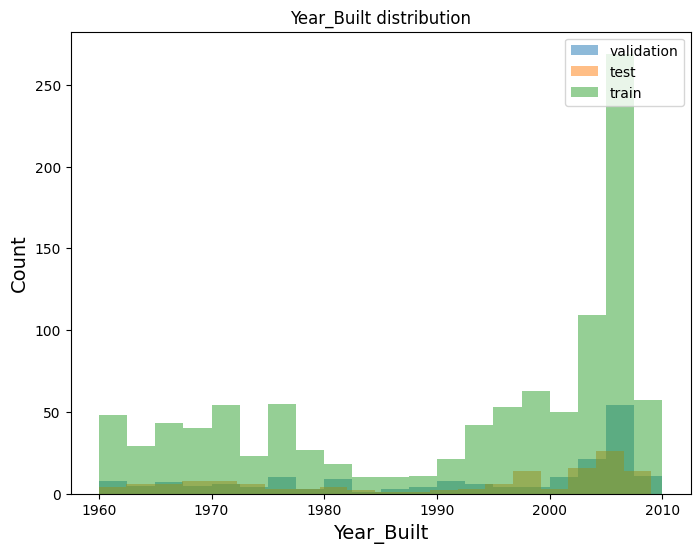

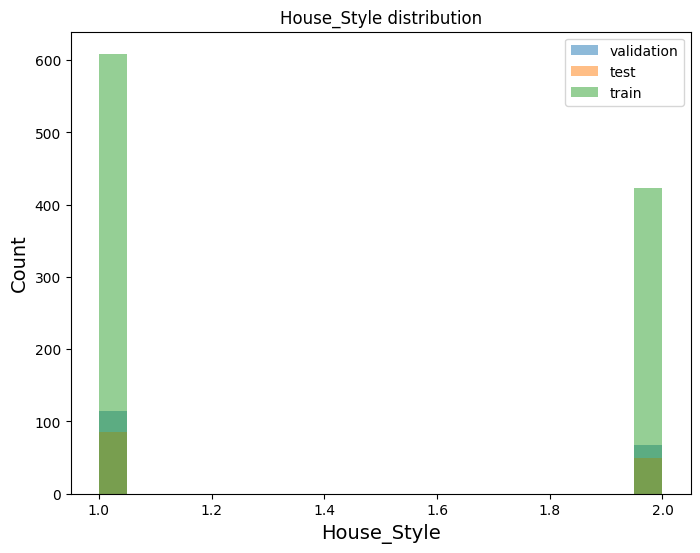

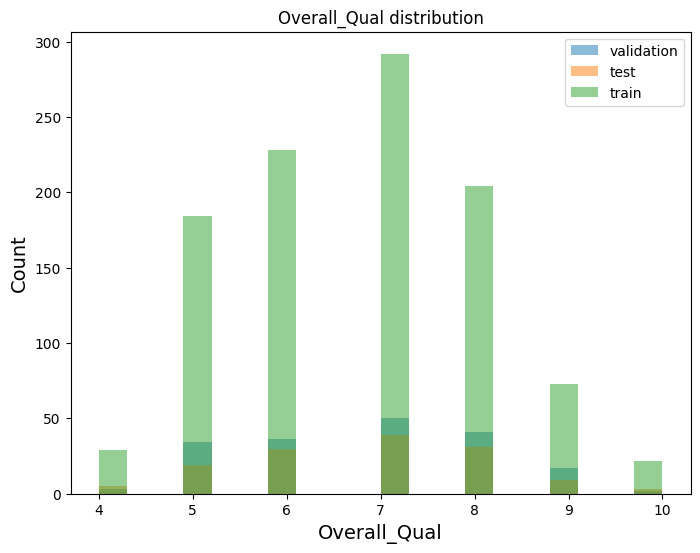

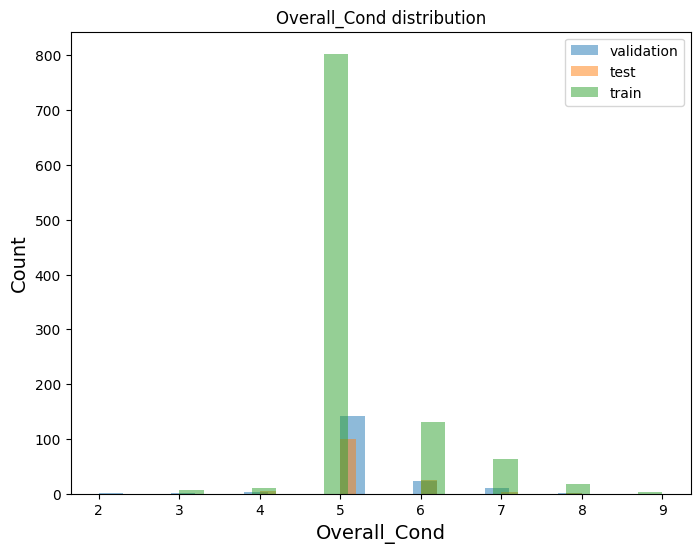

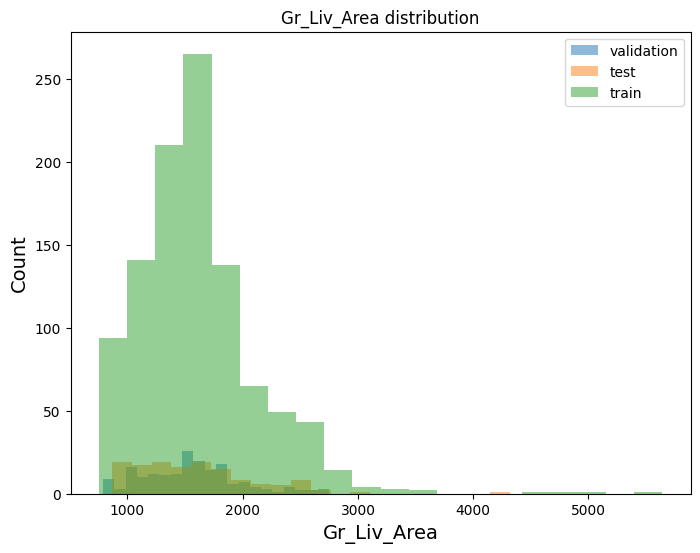

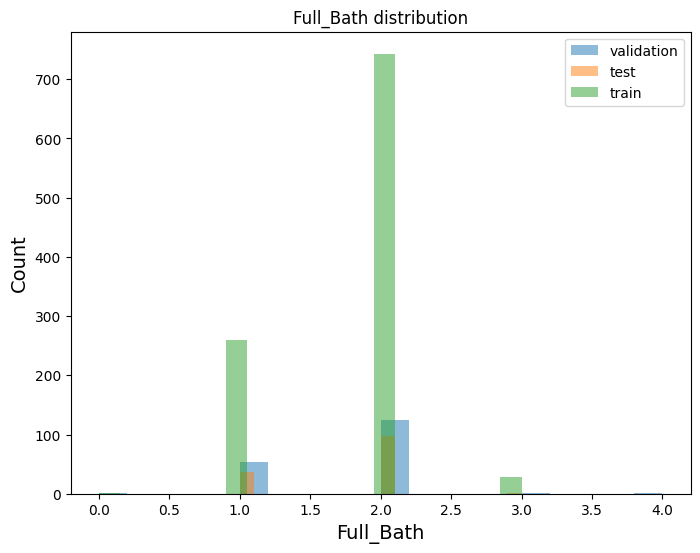

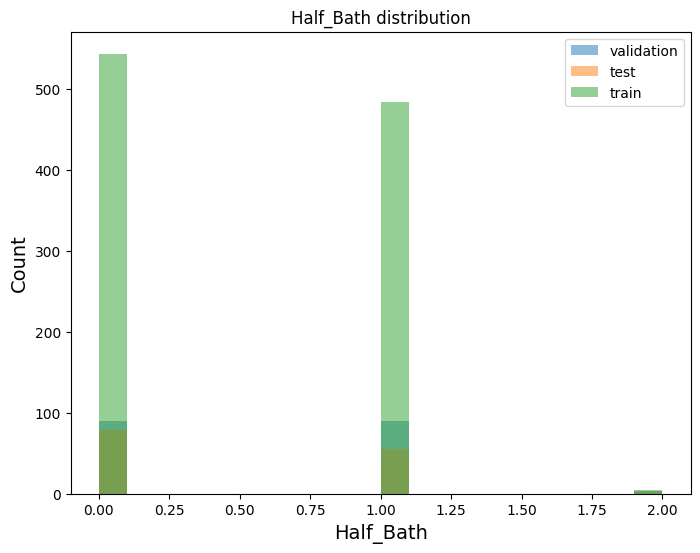

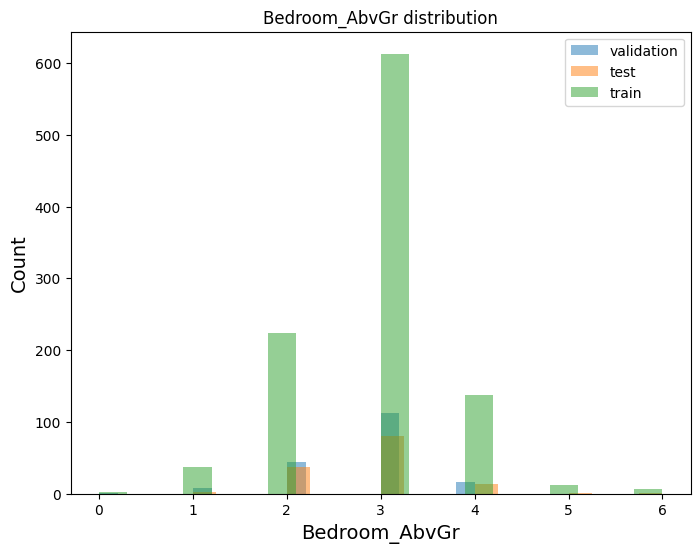

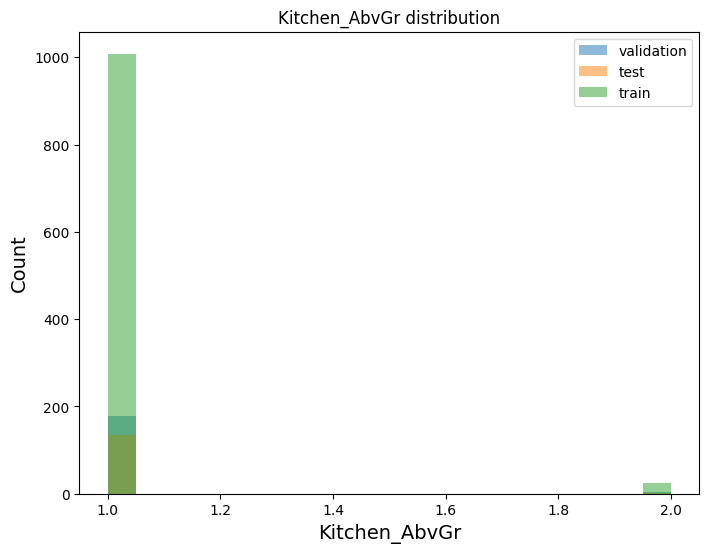

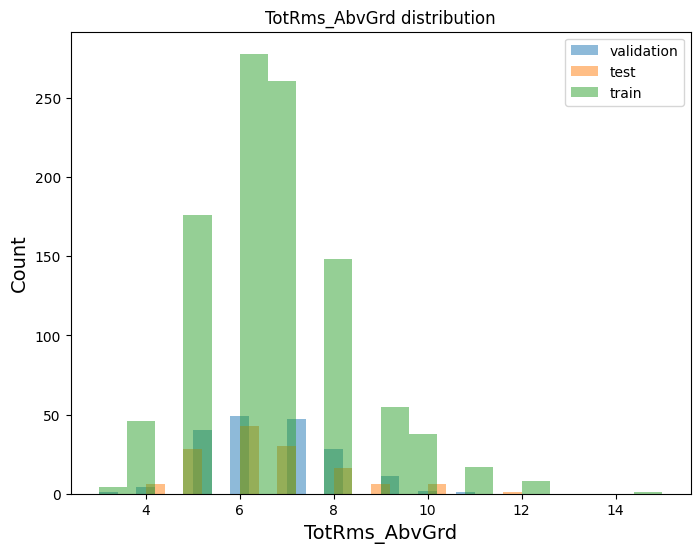

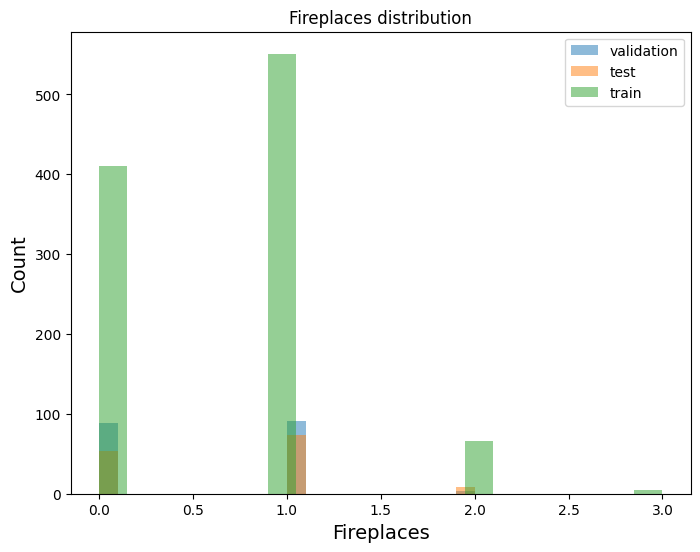

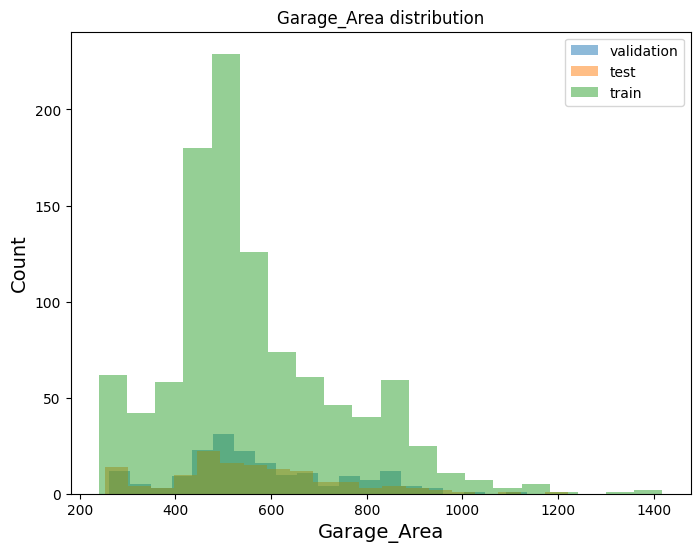

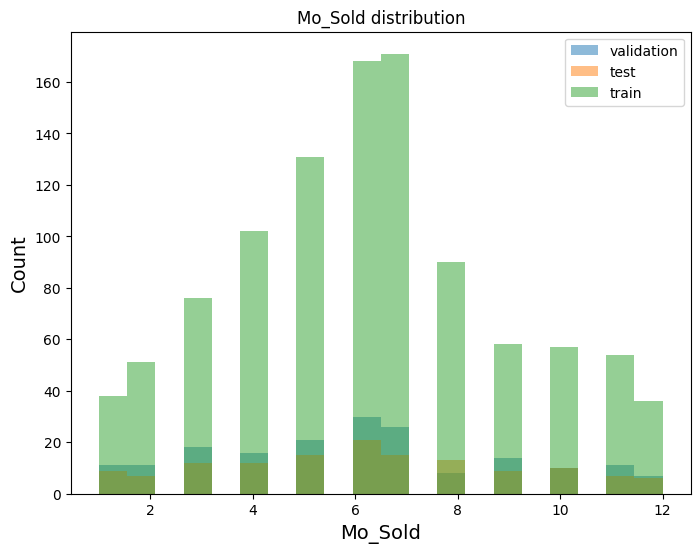

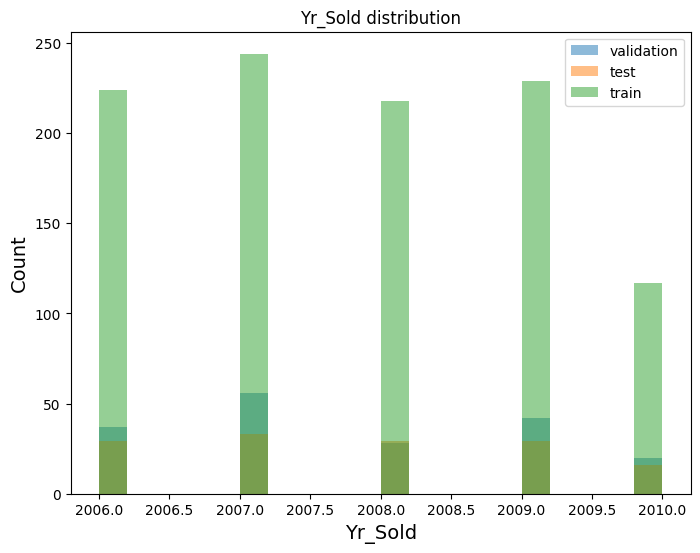

In [88]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
        "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

X_val_plot = X_val[
    [
       "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

X_train_plot = X_train[
    [
        "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [90]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [91]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [92]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 1881940462.28
Coefficient of determination: 0.77
R^2 score on tarining set = 0.7671925922017


The given output indicates the performance of a regression model on a training set, where the mean squared error (MSE) is calculated as 1881940462.28, and the coefficient of determination (R-squared) is 0.77.

The mean squared error is a measure of how well the model is fitting the training data. It represents the average of the squared differences between the predicted values and the actual values. In this case, the MSE value of 1881940462.28 indicates that the model has a relatively high average error on the training set.

The coefficient of determination (R-squared) is a measure of how well the model explains the variability of the target variable. It represents the proportion of variance in the target variable that is explained by the independent variables in the model. In this case, an R-squared value of 0.77 indicates that the model is able to explain 77% of the variability in the target variable using the given independent variables.

Overall, the given output suggests that the regression model has moderate performance on the training set, with a relatively high average error but a moderate ability to explain the variability in the target variable. However, it is important to note that the performance of the model on the training set may not necessarily generalize well to new, unseen data, so further evaluation on a test set is needed to assess the model's true predictive power.

In [93]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 1271434451.23
Coefficient of determination: 0.85
R^2 score on test set = 0.850686529877057


The mean squared error (MSE) of a regression model measures the average of the squared differences between the predicted values and the actual values. A lower value of MSE indicates a better fit of the model to the data.

The coefficient of determination (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable (SalePrice) that is explained by the independent variables in the model. It ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating no correlation between the dependent and independent variables.

In this case, the MSE of the model on the test set is 1271434451.23, which is lower than the MSE on the training set. This indicates that the model is performing well on unseen data and is not overfitting to the training data.

The R-squared score on the test set is 0.85, which means that 85% of the variance in SalePrice is explained by the independent variables in the model. This is a good value and suggests that the model is a reasonably good fit for the data.

Overall, these metrics indicate that the model is performing well and is a good predictor of SalePrice based on the given independent variables. However, it is always important to further evaluate the model and consider additional factors before making any final conclusions or decisions.

In [94]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 1039325694.54
Coefficient of determination: 0.84
R^2 score on validation set = 0.8418662895670919


Mean squared error: 1039325694.54
Coefficient of determination: 0.84
R^2 score on validation set = 0.8418662895670923
The mean squared error (MSE) is a measure of the average squared difference between the predicted and actual values in the validation set. In this case, the MSE is 1039325694.54.

The coefficient of determination, or R-squared score, is a statistical measure that represents the proportion of the variance in the target variable (in this case, SalePrice) that can be explained by the independent variables in the model. An R-squared score of 0.84 indicates that approximately 84% of the variability in SalePrice can be explained by the independent variables in the model.

The R-squared score on the validation set of 0.8418662895670923 indicates that the model is performing well on unseen data and is able to generalize to new data. This score is similar to the R-squared score on the test set, which is a good sign that the model is not overfitting to the training set. Overall, these metrics suggest that the model is a good fit for the data and can make accurate predictions on new data.

In [95]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.3203 ± 0.0532,Overall_Qual
0.3169 ± 0.0415,Gr_Liv_Area
0.0442 ± 0.0276,Garage_Area
0.0415 ± 0.0093,House_Style
0.0128 ± 0.0070,Fireplaces
0.0099 ± 0.0098,Year_Built
0.0096 ± 0.0071,TotRms_AbvGrd
0.0082 ± 0.0097,Half_Bath
0.0058 ± 0.0050,MS_SubClass
0.0053 ± 0.0027,Lot_Area


The output shows the weight and feature importance as determined by Permutation Importance method. The higher the weight, the more important the feature is in predicting the target variable, i.e. SalePrice in this case.

The results suggest that the two most important features in predicting SalePrice are Overall_Qual and Gr_Liv_Area, with weights of 0.3203 and 0.3169 respectively. This is followed by Garage_Area and House_Style with weights of 0.0442 and 0.0415 respectively.

Other features that have some impact on predicting SalePrice but to a lesser extent are Fireplaces, Year_Built, TotRms_AbvGrd, Half_Bath, MS_SubClass, Lot_Area, Kitchen_AbvGr, Overall_Cond, Lot_Frontage, Full_Bath, Bldg_Type, Mo_Sold, Bedroom_AbvGr, and Yr_Sold.

It is important to note that the weights have an associated standard deviation, which is given after the ± sign. This provides an indication of the uncertainty in the estimated feature importance.


**LICENSE**

MIT License

Copyright (c) 2023 Tanvi Manohar Valkunde

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**Refernces**


Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

and also professors sample notebook